In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

#A&B are alternative symbols for 0&1 respectively
#F&G are placeholders for where to write in the next digit



def bintoAB(x):
    if(x.__eq__('0')):
        return 'A'
    elif(x.__eq__('1')):
        return 'B'
    else:
        return 'error'
    
def multiply(x,y):
    if(x.__eq__('1') and y.__eq__('1')):
        return '1'
    else:
        return '0'
    
def swap(h1, h2, tape):
    temp_h1 = tape[h1]
    tape[h1] = tape[h2]
    tape[h2] = temp_h1
    
def insert(h, val, tape):
    for i in range(len(tape)-2, h, -1 ):
        tape[i+1] = tape[i]
    tape[h+1] = val
    
    


##################################### states

def binMult(tape):

    head = 0
    state = 0
    n = 0  #counter for getting time complexity
    
    
    vleft = '0'
    vright = '0'   #not technically states, but I could make a table and combine with all other states for everything to be individual states
    
    cont=True
    #print('The below line is the answer! Just ignore the Fs and Gs')  


    while cont:
        n +=1
        
        match state:
            case 0: #initial state, changes first digit to A/B
                vleft = tape[head]
                tape[head] = bintoAB(tape[head])
                head = 1
                state = 1
        
            case 1:  #change symbol after x to A/B
                if(tape[head].__eq__('x')):
                    head += 1
                    vright = tape[head]
                    tape[head] = bintoAB(tape[head])
                    state = 2
                else:
                    head +=1
                    
            case 2: #Go to the answer, and update the result of vleft*vright
                if(tape[head].__eq__('G')):
                    nxt = tape[head+1]
                    if(nxt.__eq__('_')):
                        tape[head] = multiply(vleft,vright)
                        tape[head+1] = 'G'
                        state = 3
                    
                    elif(nxt.__eq__('0')):
                        tape[head] = multiply(vleft,vright)
                        tape[head+1] = 'G'
                        state = 3
                    
                    else:  #its 1
                        if(multiply(vleft,vright).__eq__('0')):
                            tape[head] = '1'
                            tape[head+1] = 'G'
                            state = 3
                        else:
                            tape[head] = '0'
                            tape[head+1] = 'G'
                            head -=1
                            state = 9  #go into carry mode
            
                else:
                    head+=1
            
            
                            
                          
                
            case 3: #go back left
                nxt = tape[head+1]
                if(tape[head].__eq__('A')):
                    tape[head]= '0'
                    head+=1
                    if(nxt.__eq__('=')):         #if we're on the last digit of the second number
                        state = 5
                    else:
                        state =4
                elif(tape[head].__eq__('B')):
                    tape[head]= '1'
                    head+=1
                    if(nxt.__eq__('=')):         #if we're on the last digit of the second number
                        state = 5
                    else:
                        state=4
                else:
                    head-=1
                
                    
            case 4: #essentially same as case 1
                vright = tape[head]
                tape[head] = bintoAB(tape[head])
                state=2
                
                
            case 5:        #go to the left and move F over one
                if(tape[head].__eq__('F')):
                    swap(head, head+1, tape)
                    state = 6
                else:
                    head +=1
                    
            case 6:   #find G
                if(tape[head].__eq__('G')):
                    state = 7
                else:
                    head +=1
                    
            case 7:
                prev = tape[head-1]
                if(prev.__eq__('F')):
                    state=8
                else:
                    swap(head-1, head, tape)
                    head-=1
            
            case 8:   #go back to first multiplier
                if(tape[head].__eq__('A') or tape[head].__eq__('B')):
                    head+=1
                    
                    if(tape[head].__eq__('x')):         #if we're on the last digit of the first number
                        state = 10    #end
                    else:
                        state =1 
                        vleft = tape[head]
                        tape[head] = bintoAB(tape[head])
                                
                else:
                    head-=1
                
                
                
                
                
                
            case 9:    #rounding
                if(tape[head].__eq__('0')):
                    tape[head] = '1'
                    state = 3
                
                elif(tape[head].__eq__('1')):
                    tape[head] = '0'
                    head-=1
                    
                elif(tape[head].__eq__('=')):
                    insert(head, '1', tape)
                    head+=1
                    state = 3
                     
                else:
                    head-=1
                
            case 10:
                cont=False
                return tape, n
        
        
                
         
                
                
                
                
            
    
    




In [15]:
inittape = np.array(['1', '0', 'x', '1', '0', '=', 'F', 'G', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_','_', '_','_', '_','_', '_',])

#tests 101x111 = 100011
# 101010x110011 = 0100001011110
#it works!

#just ignore the FandG in the answer

ftape , numsteps = binMult(inittape)

print(ftape)



['B' 'A' 'x' '1' '0' '=' '1' '0' 'F' 'G' '0' '_' '_' '_' '_' '_' '_' '_'
 '_' '_' '_' '_' '_' '_' '_']


In [49]:
#now a function to generate my initial tape from random binary numbers.

def gen_inittape(bin1, bin2):
    # Create the initial part of the tape: binary1 + 'x' + binary2 + '='
    initial_tape = list(bin1) + ['x'] + list(bin2) + ['=']
    # Add the fixed 'F', 'G', and padding underscores
    answer_and_padding = ['F', 'G'] + ['_'] * 50  # Add extra space for processing
    # Combine them into one tape
    tape = np.array(initial_tape + answer_and_padding)
    return tape




def gen_rand_binary(length):
    # Generate a random binary string of the given length
    return ''.join(random.choice(['0', '1']) for _ in range(length))


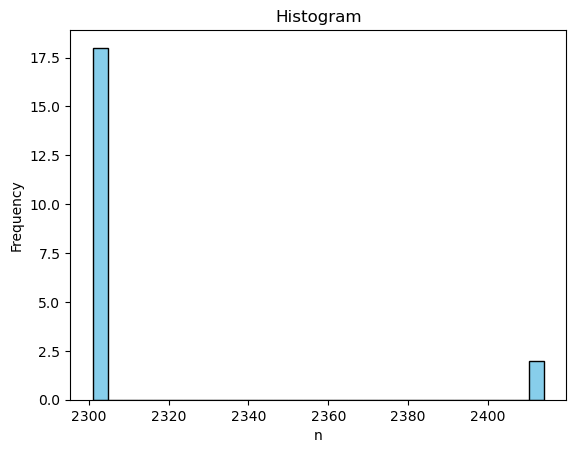

In [65]:
#What are the worst max(n), best max(n), and average ⟨n⟩ computation complexity for each La,b for La,b = [2, 3], [3, 2], [3, 5], [5, 3], [3, 12], [12, 3]?

numsteps_list = []

for i in range(20):
    b1 = gen_rand_binary(20)
    b2 = gen_rand_binary(2)

    inittape = gen_inittape(b1, b2)

    ftape , numsteps = binMult(inittape)
    numsteps_list.append(numsteps)


numsteps_list = np.array(numsteps_list)

plt.hist(numsteps_list, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('n')
plt.ylabel('Frequency')
plt.title('Histogram')
 
# Display the plot
plt.show()
    
    
